<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Data%20Preprocessing/Feature%20Scaling%20and%20Transformation/8.%20Power%20Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ⚗️ **PowerTransformer: Making Data More Gaussian**

<div align="justify">

The `PowerTransformer` is a feature transformation technique used to **normalize data** by reducing skewness and stabilizing variance. It is particularly useful when input features deviate significantly from a Gaussian distribution.

Unlike manual transformations (e.g., log, square root), `PowerTransformer` automatically estimates an optimal transformation parameter ($\lambda$) for each feature, using **maximum likelihood estimation**. This makes it a powerful, data-driven preprocessing step for improving model performance—especially for algorithms that assume or benefit from normally distributed data, such as **PCA**, **LDA**, and **linear regression**.

</div>

#### <u>Supported Methods</u>

- **Box-Cox**: Only works on **positive values** ($x > 0$)
- **Yeo-Johnson**: Works with **positive**, **zero**, and **negative values**

#### 📐 **Mathematical Formulas:-**

#### <u>Box-Cox Transformation</u> (for $x > 0$)
$$
x' =
\begin{cases}
\frac{x^{\lambda} - 1}{\lambda}, & \text{if } \lambda \ne 0 \\\\
\ln(x), & \text{if } \lambda = 0
\end{cases}
$$

<br>

#### <u>Yeo-Johnson Transformation</u> (for all real $x$)

$$
x' =
\begin{cases}
\frac{(x + 1)^\lambda - 1}{\lambda}, & \text{if } x \ge 0,\ \lambda \ne 0 \\\\
\ln(x + 1), & \text{if } x \ge 0,\ \lambda = 0 \\\\
\frac{-(-x + 1)^{2 - \lambda} + 1}{2 - \lambda}, & \text{if } x < 0,\ \lambda \ne 2 \\\\
-\ln(-x + 1), & \text{if } x < 0,\ \lambda = 2
\end{cases}
$$


#### <u>When to Use `PowerTransformer`?</u>

- The features are skewed, not normally distributed.
- You need to improve performance of models like PCA, LDA, or linear models.
- You want an automated and statistically principled way to normalize data.

>`PowerTransformer` learns one $\lambda$ per feature and transforms the data to have approximately zero mean and unit variance, while also making its distribution more symmetric and Gaussian-like.

</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing   import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.svm             import SVR
from sklearn.pipeline        import Pipeline

First, we shall experiment and witness the power of `PowerTransformer` on wine dataset.

In [2]:
# Load the wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
df   = pd.DataFrame(wine.data, columns=wine.feature_names)

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


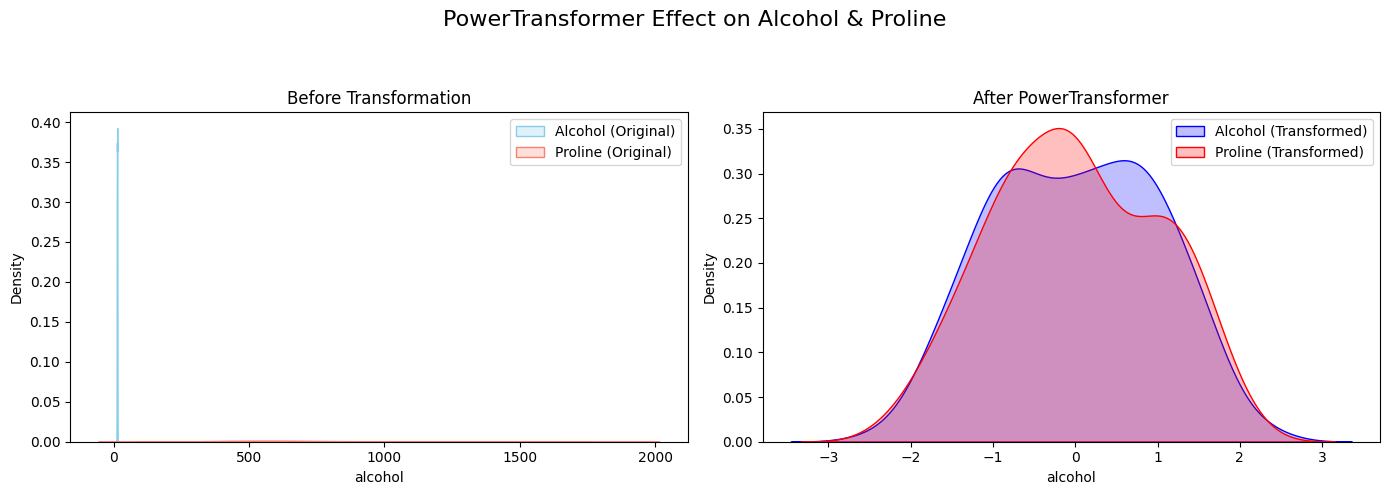

In [4]:
# Select the two features
features = ['alcohol', 'proline']

# Apply PowerTransformer (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')
df_transformed = df.copy()
df_transformed[features] = pt.fit_transform(df[features])

# Plot KDE before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('PowerTransformer Effect on Alcohol & Proline', fontsize=16)

# Before transformation
sns.kdeplot(df['alcohol'], label='Alcohol (Original)', fill=True, ax=axes[0], color='skyblue')
sns.kdeplot(df['proline'], label='Proline (Original)', fill=True, ax=axes[0], color='salmon')
axes[0].set_title('Before Transformation')
axes[0].legend()

# After transformation
sns.kdeplot(df_transformed['alcohol'], label='Alcohol (Transformed)', fill=True, ax=axes[1], color='blue')
sns.kdeplot(df_transformed['proline'], label='Proline (Transformed)', fill=True, ax=axes[1], color='red')
axes[1].set_title('After PowerTransformer')
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

After applying `PowerTransformer`:

- Both features are transformed to have mean ≈ 0 and variance ≈ 1.
- The skewness in `proline` is significantly reduced, resulting in a more symmetric and Gaussian-like distribution.
- `alcohol`, which was less skewed initially, is also centered and rescaled appropriately to align with the standardized scale.

> ✅ This transformation improves the suitability of both features for models that assume normally distributed inputs.


Now that we've observed the effect of `PowerTransformer` on selected features in the Wine dataset, let's move on to apply it to a more complex and real-world dataset: `fetch_california_housing`.


In [5]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(as_frame=True, return_X_y=True)

In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
X = X.iloc[:,:-2]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [9]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
def plots(df, var, t):
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  sns.kdeplot(df[var])
  plt.title('before ' + str(t).split('(')[0])

  plt.subplot(122)
  p1 = t.fit_transform(df[[var]]).flatten()
  sns.kdeplot(p1)
  plt.title('after ' + str(t).split('(')[0])

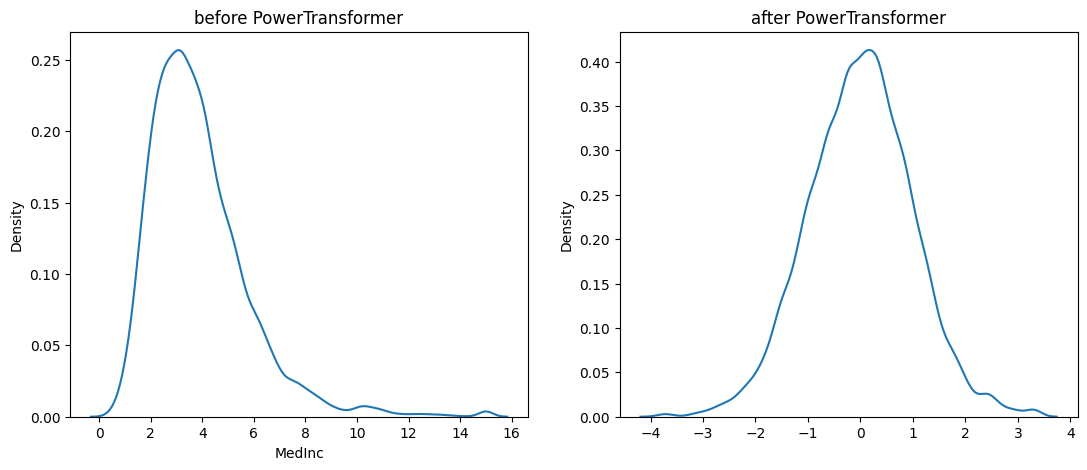

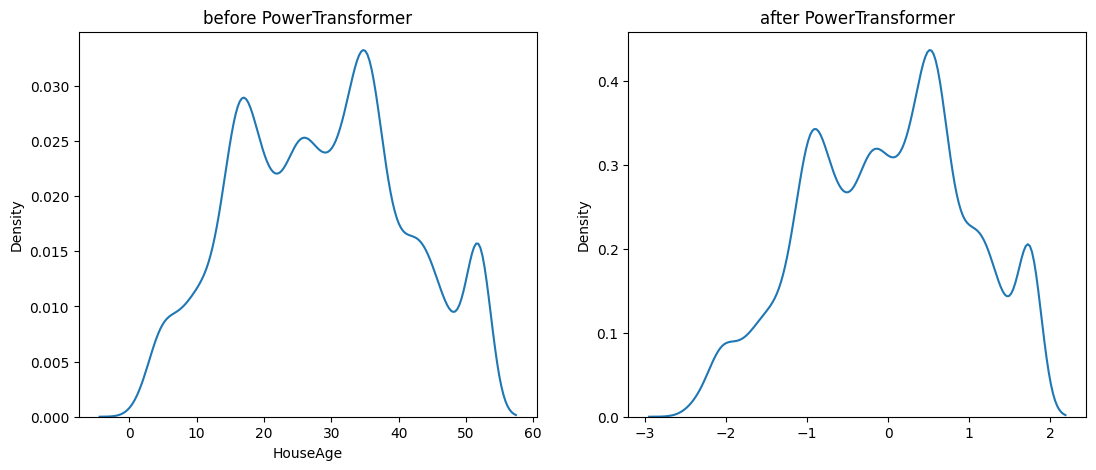

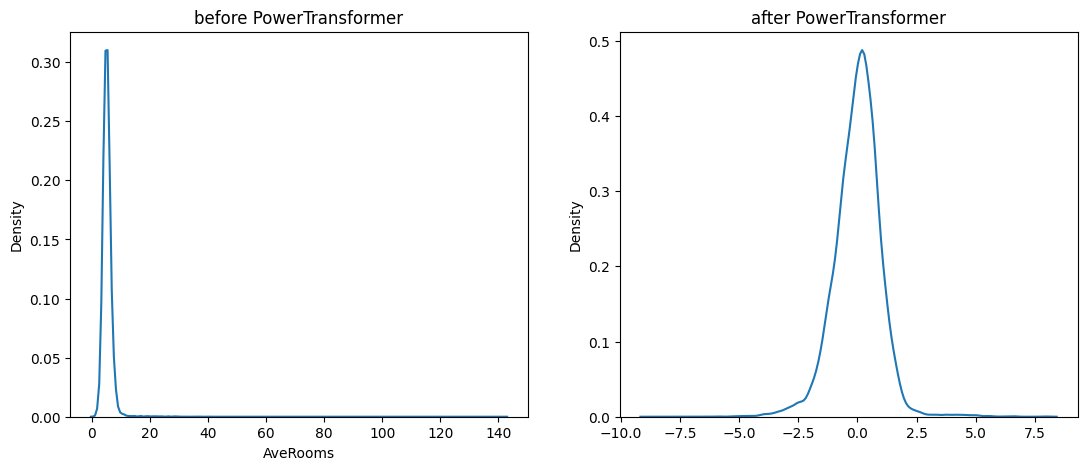

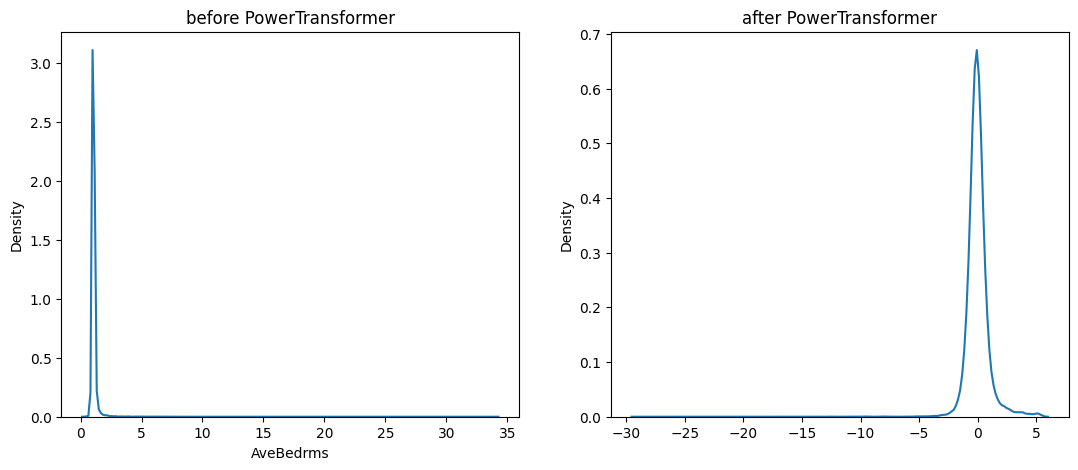

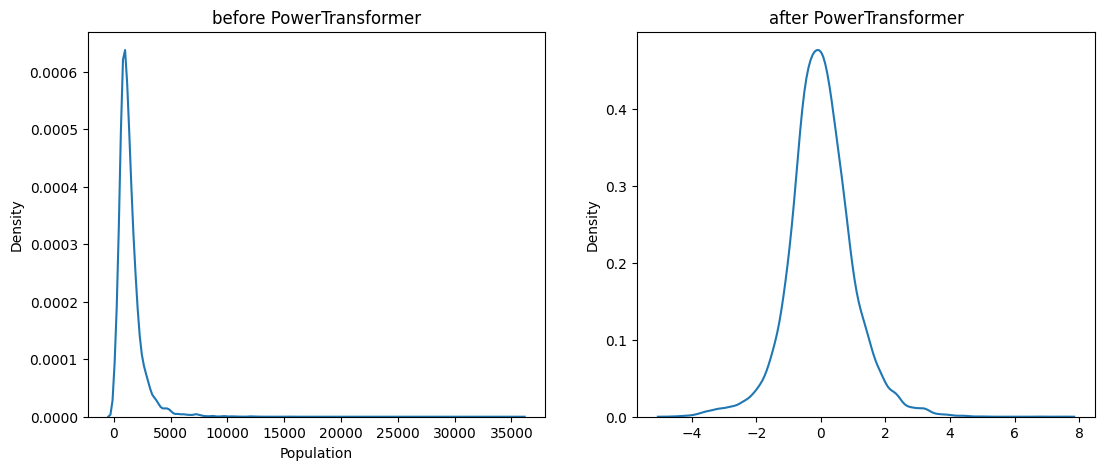

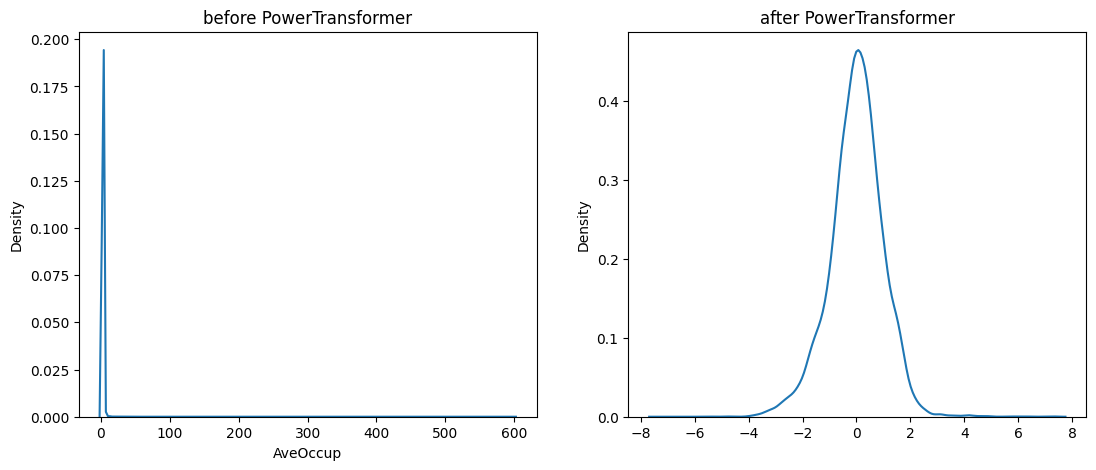

In [12]:
for col in x_train.columns:
  plots(x_train, col, PowerTransformer(method='box-cox'))
  # the default method is 'yeo-johnson'

In [13]:
p = PowerTransformer(method='box-cox')
p.fit_transform(x_train)

array([[ 0.40281908, -1.92782548,  1.42598869,  0.82522832, -1.96446906,
         0.84580969],
       [ 0.47870349,  1.75743615,  0.12767533,  0.34757827,  0.3230421 ,
         0.65346554],
       [ 0.24184739, -0.16025422, -0.36702734, -0.09053295, -0.21606303,
        -0.01882737],
       ...,
       [-0.19787028,  0.22945234, -1.3508525 , -1.12159002, -0.70907513,
        -1.94051908],
       [ 1.02558383,  0.45750336, -0.47358212,  0.05988359, -0.17597579,
        -0.89334188],
       [-1.88200113, -1.07487729, -1.04180675,  0.34757827, -0.21336266,
         0.77358437]])

In [14]:
p.lambdas_

array([ 0.09829721,  0.81124523, -0.28269238, -1.58333514,  0.23291762,
       -0.49773796])

When we transform the test set, the **λ (lambda) parameters** learned from the training set during fitting are used to apply the same transformation to the test data. This ensures consistency and prevents any information from the test set leaking into the model training process.


In [15]:
def model_accuracy_scaled(mod):
  model_scaled = Pipeline([
      ('scale', PowerTransformer(method='box-cox')),
      ('model', mod)
  ])
  model_scaled.fit(x_train, y_train)
  return model_scaled.score(x_test, y_test)

def model_accuracy_unscaled(mod):
  model_unscaled = Pipeline([
      ('model', mod)
  ])
  model_unscaled.fit(x_train, y_train)
  return model_unscaled.score(x_test, y_test)

In [16]:
# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Print accuracy scores
print(f"{'Model':<25} {'Unscaled R²':<15} {'Scaled R²'}")
print("-" * 55)
for name, model in models.items():
    unscaled_score = model_accuracy_unscaled(model)
    scaled_score = model_accuracy_scaled(model)
    print(f"{name:<25} {unscaled_score:<15.4f} {scaled_score:.4f}")

Model                     Unscaled R²     Scaled R²
-------------------------------------------------------
Linear Regression         0.5251          0.5532
KNN Regressor             0.1719          0.6460
SVR                       -0.0173         0.6944
Random Forest             0.6699          0.6697


#### Conclusion: Effect of PowerTransformer on Model Performance

From the results above, we observe that applying `PowerTransformer` leads to a **notable improvement** in performance for most models, particularly those that are **sensitive to feature distribution and scale**:

- **Linear Regression** shows a moderate improvement in R² score, indicating better linearity after transformation.
- **KNN Regressor** sees a substantial boost, as it heavily relies on distance metrics which benefit from normalized and symmetrically distributed features.
- **Support Vector Regressor (SVR)** improves dramatically, highlighting how sensitive kernel methods are to input distributions.
- **Random Forest**, a tree-based model, shows **negligible change**, which is expected since tree-based models are **scale-invariant** and do not assume feature distributions.

> 🔎 **PowerTransformer is particularly beneficial for algorithms that assume normality or depend on distance calculations, while tree-based models remain unaffected.**
